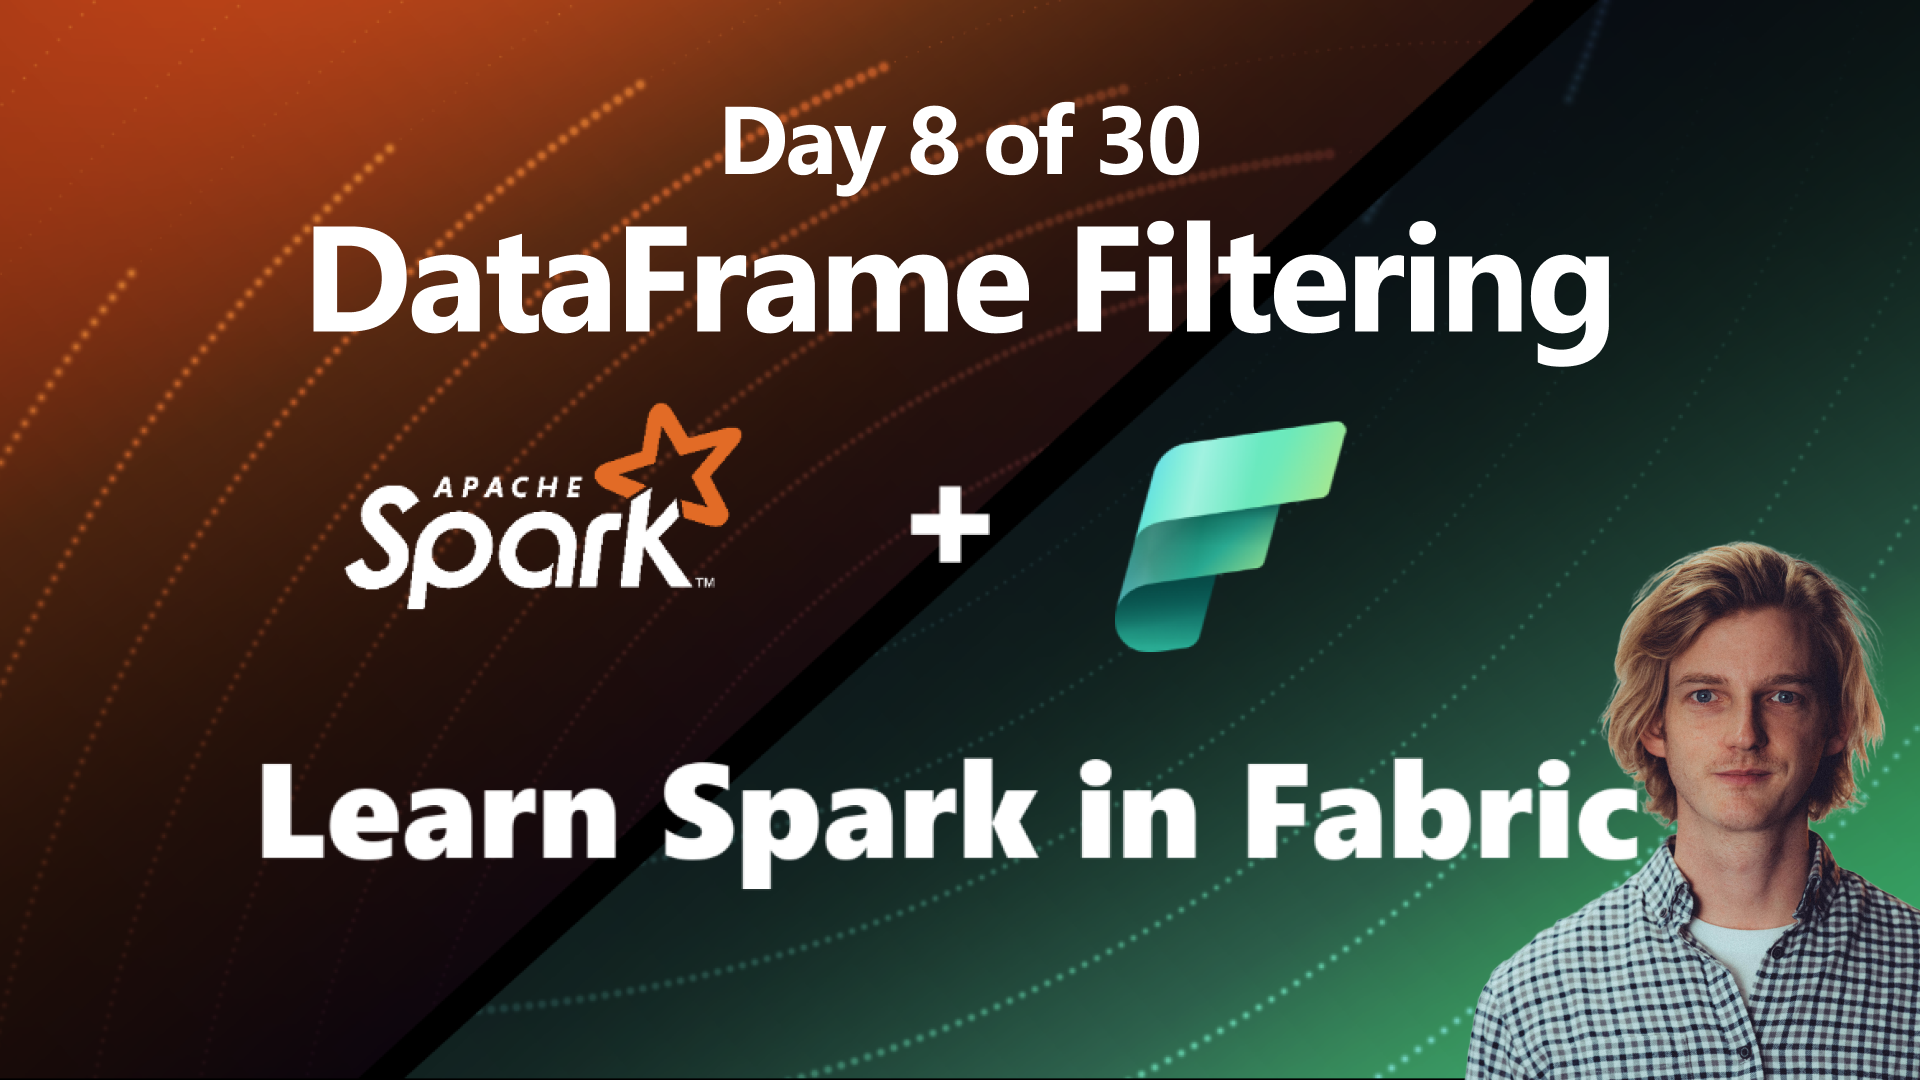

#### First, we need a dataframe

In [2]:
df = spark.sql("SELECT * FROM SparkSeptember.propertysales LIMIT 1000")
display(df)

StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 4, Finished, Available)

SynapseWidget(Synapse.DataFrame, c4a54c40-92c1-4998-9540-924f454766c2)

#### Simple filtering

In [14]:
# simple filter condition (pythonic)
df.filter(df['City'] == "New York").show()

# not equal to
df.filter(df['City'] != "New York").show()

# not equal to (another way) - not very readable
df.filter(~(df['City'] == "New York")).show()



StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 16, Finished, Available)

+----------------+-----------------+--------+-------------+--------------+
|         Address|            Agent|    City|SalePrice_USD|          Type|
+----------------+-----------------+--------+-------------+--------------+
|1 Rowley Street |Penelope Pullman |New York|       745000|Detached House|
+----------------+-----------------+--------+-------------+--------------+

+-------------------+------------+-----------+-------------+---------+
|            Address|       Agent|       City|SalePrice_USD|     Type|
+-------------------+------------+-----------+-------------+---------+
|13a lollipop avenue| Jack Smith |Los Angeles|       345000|Apartment|
|       34 the drive|Sheila Sammi|    Atlanta|       459000|    House|
+-------------------+------------+-----------+-------------+---------+

+-------------------+------------+-----------+-------------+---------+
|            Address|       Agent|       City|SalePrice_USD|     Type|
+-------------------+------------+-----------+---------

#### StartsWith, Endswith

In [12]:
#startswith 
df.filter(df.City.startswith("L")).show()

#endswith
df.filter(df.City.endswith("ta")).show()


StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 14, Finished, Available)

+-------------------+-----------+-----------+-------------+---------+
|            Address|      Agent|       City|SalePrice_USD|     Type|
+-------------------+-----------+-----------+-------------+---------+
|13a lollipop avenue|Jack Smith |Los Angeles|       345000|Apartment|
+-------------------+-----------+-----------+-------------+---------+

+------------+------------+-------+-------------+-----+
|     Address|       Agent|   City|SalePrice_USD| Type|
+------------+------------+-------+-------------+-----+
|34 the drive|Sheila Sammi|Atlanta|       459000|House|
+------------+------------+-------+-------------+-----+



#### Multiple conditions

In [15]:
# Multple conditions, with AND
# where city is not Atlanta and the SalePrice is greater than 400k 
df.filter((df.City != 'Atlanta') & (df.SalePrice_USD > 400000) ).show()

StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 17, Finished, Available)

+----------------+-----------------+--------+-------------+--------------+
|         Address|            Agent|    City|SalePrice_USD|          Type|
+----------------+-----------------+--------+-------------+--------------+
|1 Rowley Street |Penelope Pullman |New York|       745000|Detached House|
+----------------+-----------------+--------+-------------+--------------+



In [16]:
# Multple conditions, with OR
# where city is Atlanta OR the city is Los Angeles 
df.filter((df.City == 'Atlanta') | (df.City == 'Los Angeles') ).show()

StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 18, Finished, Available)

+-------------------+------------+-----------+-------------+---------+
|            Address|       Agent|       City|SalePrice_USD|     Type|
+-------------------+------------+-----------+-------------+---------+
|13a lollipop avenue| Jack Smith |Los Angeles|       345000|Apartment|
|       34 the drive|Sheila Sammi|    Atlanta|       459000|    House|
+-------------------+------------+-----------+-------------+---------+



#### Is a member of a list 

In [18]:
#Filter df if df.City is in the list cities_we_care_about
cities_we_care_about=["Atlanta","Los Angeles"]
df.filter(df.City.isin(cities_we_care_about)).show()

StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 20, Finished, Available)

+-------------------+------------+-----------+-------------+---------+
|            Address|       Agent|       City|SalePrice_USD|     Type|
+-------------------+------------+-----------+-------------+---------+
|13a lollipop avenue| Jack Smith |Los Angeles|       345000|Apartment|
|       34 the drive|Sheila Sammi|    Atlanta|       459000|    House|
+-------------------+------------+-----------+-------------+---------+



#### String Contains 

In [20]:
# filter df if the Type contains 'House' 

df.filter(df.Type.contains('House')).show() 

StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 22, Finished, Available)

+----------------+-----------------+--------+-------------+--------------+
|         Address|            Agent|    City|SalePrice_USD|          Type|
+----------------+-----------------+--------+-------------+--------------+
|1 Rowley Street |Penelope Pullman |New York|       745000|Detached House|
|    34 the drive|     Sheila Sammi| Atlanta|       459000|         House|
+----------------+-----------------+--------+-------------+--------------+



#### SQL LIKE filtering

In [25]:
# filer where 'House' appears somewhere in df.Type
df.filter(df.Type.like("%House%")).show()

# filter where df.Type starts with House...
df.filter(df.Type.like("House%")).show()

# filter where df.Address endswith avenue

df.filter(df.Address.like("%avenue")).show()


StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 27, Finished, Available)

+----------------+-----------------+--------+-------------+--------------+
|         Address|            Agent|    City|SalePrice_USD|          Type|
+----------------+-----------------+--------+-------------+--------------+
|1 Rowley Street |Penelope Pullman |New York|       745000|Detached House|
|    34 the drive|     Sheila Sammi| Atlanta|       459000|         House|
+----------------+-----------------+--------+-------------+--------------+

+------------+------------+-------+-------------+-----+
|     Address|       Agent|   City|SalePrice_USD| Type|
+------------+------------+-------+-------------+-----+
|34 the drive|Sheila Sammi|Atlanta|       459000|House|
+------------+------------+-------+-------------+-----+

+-------------------+-----------+-----------+-------------+---------+
|            Address|      Agent|       City|SalePrice_USD|     Type|
+-------------------+-----------+-----------+-------------+---------+
|13a lollipop avenue|Jack Smith |Los Angeles|       345000

#### Other ways to use SQL expressions

In [27]:
# filtering using raw WHERE conditions you would use in SQL
df.filter("City != 'Los Angeles'").show()

df.filter("City <> 'Los Angeles'").show()

StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 29, Finished, Available)

+----------------+-----------------+--------+-------------+--------------+
|         Address|            Agent|    City|SalePrice_USD|          Type|
+----------------+-----------------+--------+-------------+--------------+
|1 Rowley Street |Penelope Pullman |New York|       745000|Detached House|
|    34 the drive|     Sheila Sammi| Atlanta|       459000|         House|
+----------------+-----------------+--------+-------------+--------------+

+----------------+-----------------+--------+-------------+--------------+
|         Address|            Agent|    City|SalePrice_USD|          Type|
+----------------+-----------------+--------+-------------+--------------+
|1 Rowley Street |Penelope Pullman |New York|       745000|Detached House|
|    34 the drive|     Sheila Sammi| Atlanta|       459000|         House|
+----------------+-----------------+--------+-------------+--------------+



#### Using df.where() 

For any of the above functions, you can also use df.where() instead of df.filter() if you prefer - it gives the same result (when using the Spark SQL API)

In [29]:
df.where(df.City == 'Los Angeles').show()

StatementMeta(, 6616806d-1a2e-4d4c-a987-7978188e3d72, 31, Finished, Available)

+-------------------+-----------+-----------+-------------+---------+
|            Address|      Agent|       City|SalePrice_USD|     Type|
+-------------------+-----------+-----------+-------------+---------+
|13a lollipop avenue|Jack Smith |Los Angeles|       345000|Apartment|
+-------------------+-----------+-----------+-------------+---------+



---
#### Your final tasks: 

✅ View this notebook and all others in this series on GitHub. 

✅ Leave a comment below

✅ Subscribe 

✅ Like